In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans

In [65]:
data = pd.read_csv('student-mat.csv', sep=';')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [66]:
columns = [
    'G2',
    'G3',
]
model = data[columns].copy()
model

,G2,G3
0,6,6
1,5,6
2,8,10
3,14,15
4,10,10
...,...,...
390,9,9
391,16,16
392,8,7
393,12,10


In [67]:
x = model.drop(['G3'], axis=1)
y = model[['G3']]
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.3, random_state=42)

In [68]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

linear_coef = linear_model.coef_
linear_intercept = linear_model.intercept_
linear_predict = linear_model.predict(x_test)
linear_score = linear_model.score(x,y)
linear_mse = mean_squared_error(y_test, linear_predict)

print(f'This is the coefficient {linear_coef}')
print(f'This is the intercept {linear_intercept}')
print(f'This is the prediction {linear_predict}')
print(f'This is the score {linear_score}')
print(f'This is the MSE {linear_mse}')

This is the coefficient [[1.10784209]]
This is the intercept [-1.45679468]
This is the prediction [[ 7.40594206]
 [11.83731043]
 [ 4.08241578]
 [ 8.51378416]
 [ 8.51378416]
 [12.94515253]
 [18.48436299]
 [ 6.29809997]
 [ 7.40594206]
 [12.94515253]
 [15.16083671]
 [ 6.29809997]
 [14.05299462]
 [11.83731043]
 [14.05299462]
 [ 7.40594206]
 [ 6.29809997]
 [10.72946834]
 [15.16083671]
 [ 8.51378416]
 [14.05299462]
 [16.26867881]
 [15.16083671]
 [ 5.19025788]
 [ 8.51378416]
 [19.59220508]
 [10.72946834]
 [ 9.62162625]
 [17.3765209 ]
 [10.72946834]
 [ 8.51378416]
 [ 7.40594206]
 [15.16083671]
 [12.94515253]
 [ 6.29809997]
 [ 4.08241578]
 [-1.45679468]
 [15.16083671]
 [11.83731043]
 [ 8.51378416]
 [ 5.19025788]
 [10.72946834]
 [14.05299462]
 [ 8.51378416]
 [15.16083671]
 [ 9.62162625]
 [11.83731043]
 [14.05299462]
 [12.94515253]
 [15.16083671]
 [12.94515253]
 [15.16083671]
 [10.72946834]
 [ 8.51378416]
 [ 4.08241578]
 [12.94515253]
 [ 9.62162625]
 [ 6.29809997]
 [15.16083671]
 [16.26867881]
 [

/Users/robin/Documents/GitHub/CSCI_111_Final_Project/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [69]:
lasso_model = Lasso()
lasso_model.fit(x_train, y_train)

lasso_coef = lasso_model.coef_
lasso_intercept = lasso_model.intercept_
lasso_predict = lasso_model.predict(x_test)
lasso_score = lasso_model.score(x,y)
lasso_mse = mean_squared_error(y_test, lasso_predict)
print(f'This is the coefficient {lasso_coef}')
print(f'This is the intercept {lasso_intercept}')
print(f'This is the prediction {lasso_predict}')
print(f'This is the score {lasso_score}')
print(f'This is the MSE {lasso_mse}')


This is the coefficient [1.03538682]
This is the intercept [-0.67763794]
This is the prediction [ 7.60545659 11.74700386  4.49929614  8.64084341  8.64084341 12.78239067
 17.95932476  6.57006978  7.60545659 12.78239067 14.85316431  6.57006978
 13.81777749 11.74700386 13.81777749  7.60545659  6.57006978 10.71161704
 14.85316431  8.64084341 13.81777749 15.88855112 14.85316431  5.53468296
  8.64084341 18.99471157 10.71161704  9.67623023 16.92393794 10.71161704
  8.64084341  7.60545659 14.85316431 12.78239067  6.57006978  4.49929614
 -0.67763794 14.85316431 11.74700386  8.64084341  5.53468296 10.71161704
 13.81777749  8.64084341 14.85316431  9.67623023 11.74700386 13.81777749
 12.78239067 14.85316431 12.78239067 14.85316431 10.71161704  8.64084341
  4.49929614 12.78239067  9.67623023  6.57006978 14.85316431 15.88855112
 12.78239067  8.64084341  7.60545659  4.49929614  6.57006978 16.92393794
  8.64084341  9.67623023  9.67623023 14.85316431  7.60545659  9.67623023
 12.78239067 18.99471157 10.

/Users/robin/Documents/GitHub/CSCI_111_Final_Project/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [70]:
joblib.dump(linear_model, 'linear_model.joblib')
joblib.dump(lasso_model, 'lasso_model.joblib')
print("Model Saved")

Model Saved


In [71]:
# new_student = np.array([[20, 15]])
# linear_model = joblib.load('linear_model.joblib')
# lasso_model = joblib.load('lasso_model.joblib')

# linear_pred = linear_model.predict(new_student)
# lasso_pred = lasso_model.predict(new_student)

# print("\nPredictions for new student:")
# print(f"Linear Regression prediction: {linear_pred[0]:}")
# print(f"Lasso prediction: {lasso_pred[0]:}")

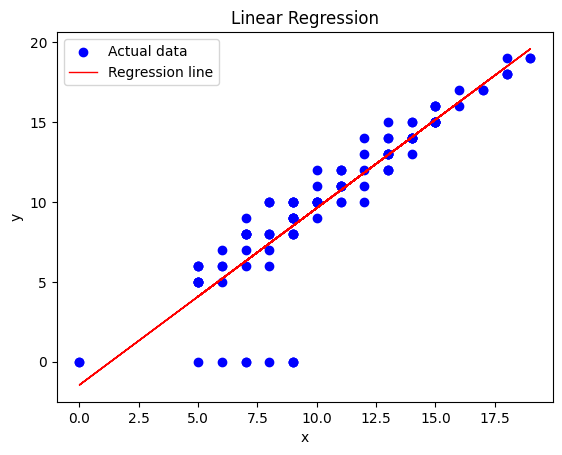

In [72]:
plt.scatter(x_test, y_test, color='blue', label='Actual data')
plt.plot(x_test, linear_predict, color='red', linewidth=1, label='Regression line')
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


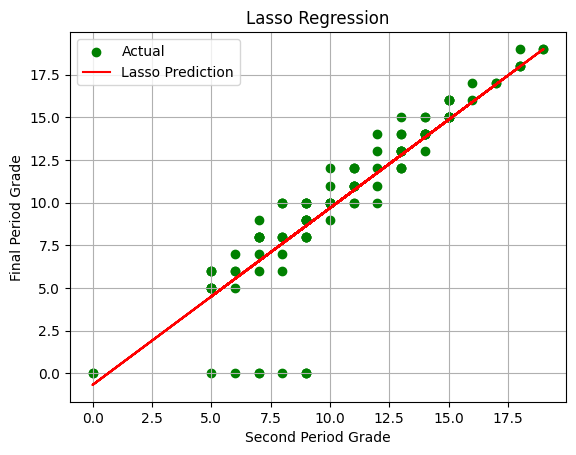

In [73]:
plt.scatter(x_test, y_test, color='green', label='Actual')  # G2 vs Actual G3
plt.plot(x_test, lasso_predict, color='red', label='Lasso Prediction')  # G2 vs Predicted G3
plt.legend()
plt.title('Lasso Regression')
plt.xlabel('Second Period Grade')
plt.ylabel('Final Period Grade')
plt.grid(True)
plt.show()


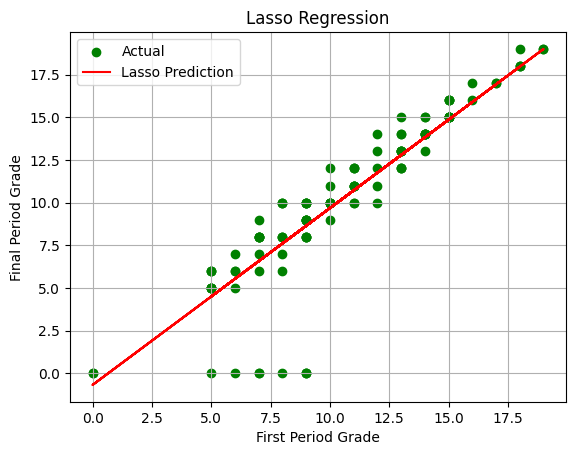

In [74]:
plt.scatter(x_test[:, 0], y_test, color='green', label='Actual')  # G1 vs Actual G3
plt.plot(x_test[:, 0], lasso_predict, color='red', label='Lasso Prediction')  # G1 vs Predicted G3
plt.legend()
plt.title('Lasso Regression')
plt.xlabel('First Period Grade')
plt.ylabel('Final Period Grade')
plt.grid(True)
plt.show()

In [75]:
linear_feature_importance = pd.Series(
    np.abs(linear_coef[0]),
    index=x.columns,
    name='Linear Coefficients'
)
lasso_feature_importance = pd.Series(
    np.abs(lasso_coef),
    index=x.columns,
    name='Lasso Coefficients'
)
print(linear_feature_importance.sort_values(ascending=False))
print(lasso_feature_importance.sort_values(ascending=False))


G2    1.107842
Name: Linear Coefficients, dtype: float64
G2    1.035387
Name: Lasso Coefficients, dtype: float64
